#HW4


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

### Enviroment
1. Episode task, $\gamma$ =1, $\alpha$=0.1, $\epsilon$=0.3
2. r=-100 if moves into the swamps; all other transitions yield r=-1
3. Use 30 simulation runs to estimate the average value 
4. Environment size is 10x5 
5. $S_0$ is (0, 3) and $S_T$ is (9,3) 

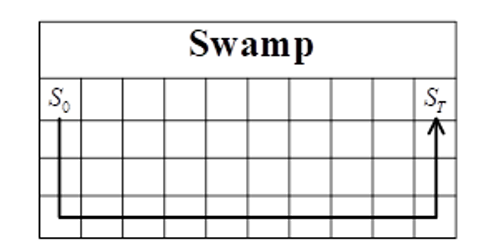

In [2]:
r=1
alpha = 0.1
epsilon = 0.3
L = 10
D = 5
s0 = [0,3]
sT = [9,3]
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
rd.seed(36)
tempQ = rd.rand(10,5,4)
# tempQ[:,:,3] = 0.7
tempQ[9,3,:] =np.zeros(4)

In [3]:
def step(state, action):
  state_n = (state+ACTIONS[int(action)]).tolist()
  if state_n[0]<0 or state_n[1]<0 or state_n[0]>=L or state_n[1]>=D:
    state_n = state
  if state_n[1] == D-1:
    return state_n,-100
  return state_n, -1

In [4]:
def epsilon_greedy(q,s,epsilon):
  if rd.random()<epsilon:
    return rd.randint(0,4)
  else:
    return np.argmax(q[s[0],s[1],:])

In [5]:
def Q_learning(Q,episode):      
######## YOUR CODE HERE ########
  state=s0
  Q = tempQ.copy()
  returns = []
  for i in range(episode):
    state=s0
    G=0
    tmp_return=0
    while np.array_equal(state,sT)==False:
      action = epsilon_greedy(Q,state,epsilon)
      state_next,reward=step(state,action)
      tmp_return=reward+tmp_return
      G=reward+r*G
      Q[state[0],state[1],action]=Q[state[0],state[1],action]+alpha*(reward+\
      r*np.max(Q[state_next[0],state_next[1],:])-Q[state[0],state[1],action])
      state = state_next
    returns.append(tmp_return)
####################################
  return returns,Q

In [6]:
def sarsa(Q,episode):
######## YOUR CODE HERE ########  
  Q = tempQ.copy()
  returns = []
  for i in range(episode):
    state=s0
    G=0
    tmp_return=0
    action=epsilon_greedy(Q,state,epsilon)
    while np.array_equal(state,sT)==False:
      state_next,reward=step(state,action)
      G=reward+r*G
      tmp_return=reward+tmp_return
      action_next=epsilon_greedy(Q,state_next,epsilon)
      Q[state[0],state[1],action]=Q[state[0],state[1],action]+alpha*(reward+\
      r*Q[state_next[0],state_next[1],action_next]-Q[state[0],state[1],action])
      state = state_next
      action = action_next
    returns.append(tmp_return)###
####################################
  return returns,Q

# Result(60%):

Average 30 simulation, 2000 episode per simulation.

In [7]:
def averages(a):
  return np.array([np.average(a[:i+1]) for i in range(len(a))])

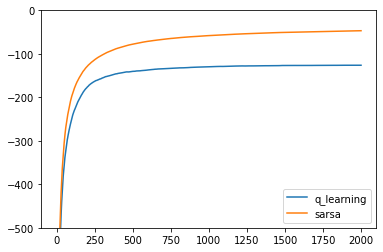

In [8]:
Q_sarsa = rd.rand(10,5,4)
Q_Qlearn = rd.rand(10,5,4)
Q_learning_average = np.average([averages(Q_learning(Q_Qlearn,2000)[0]) for i in range(30)],axis=0)
Sarsa_average = np.average([averages(sarsa(Q_sarsa,2000)[0]) for i in range(30)],axis=0)
plt.plot(Q_learning_average,label='q_learning')
plt.plot(Sarsa_average,label='sarsa')
plt.ylim(-500, 0)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

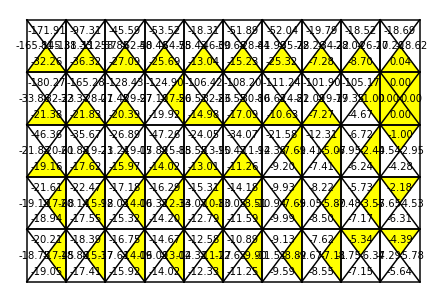

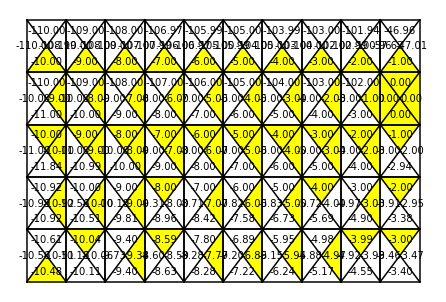

In [9]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.table import Table
def drawTable(data,filename):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(10):
    for j in range(5):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[j][i])
      if data[j][i][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow')) #左
      if data[j][i][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow')) #上
      if data[j][i][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))#右
      if data[j][i][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))#下

      plt.text(i+0.2,j+0.5,'%.2f' %data[j][i][1], verticalalignment='center', horizontalalignment='center')#左
      plt.text(i+0.5,j+0.2,'%.2f' %data[j][i][2], verticalalignment='center', horizontalalignment='center')#上
      plt.text(i+0.8,j+0.5,'%.2f' %data[j][i][3], verticalalignment='center', horizontalalignment='center')#右
      plt.text(i+0.5,j+0.8,'%.2f' %data[j][i][0], verticalalignment='center', horizontalalignment='center')#下
  
  from google.colab import files #google.colab only
  plt.savefig(filename)
  files.download(filename) #google.colab only
Q_sarsa=sarsa(Q_sarsa,10000)[1]
Q_Qlearn=Q_learning(Q_Qlearn,10000)[1]
drawTable(np.rot90(Q_sarsa,1),'sarsa.png')
drawTable(np.rot90(Q_Qlearn),'Qlearn.png')
# drawTable(tempQ,'Qlearn.png')
# print(Q_sarsa[0,0,:])

#Experiments and Analysis(40%)

1. Plot the average rewards of Sarsa and Q-learning, and explain your result.(20%)
2. Plot the Q-values of Sarsa and Q-learning, and explain your result.(10%)
2. Complete Monte Carlo, and compare average rewards.(10%) 



In [10]:
def MC_first():
  returns = []
  Q=tempQ.copy()
  for j in range(2000):
    tra = []
    states =[s0]
    state=s0
    while np.array_equal(state,sT)==False:
      action=epsilon_greedy(Q,state,epsilon)
      states.append(state)
      state_next,reward=step(state,action)
      tra.append([state,action,state_next,reward])
      T = len(tra)
      G=0
      tmp_return=0
      state = state_next
    for i in range(T-1,0,-1):
        G=tra[i][3]+r*G
        tmp_return=tra[i][3]+tmp_return
        if i !=0 :
          if states[i] not in states[0:i-1]:
            Q[tra[i][0][0],tra[i][0][1],tra[i][1]]=Q[tra[i][0][0],tra[i][0][1]\
            ,tra[i][1]]+alpha*(G-Q[tra[i][0][0],tra[i][0][1],tra[i][1]])
    # print(G)
    returns.append(tmp_return)
  return returns

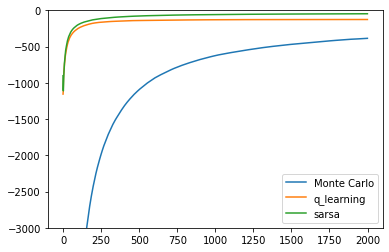

In [11]:
MC_first_average = np.average([averages(MC_first()) for i in range(30)],axis=0)
plt.plot(MC_first_average,label='Monte Carlo')
plt.plot(Q_learning_average,label='q_learning')
plt.plot(Sarsa_average,label='sarsa')
plt.ylim(-3000, 0)
plt.legend()
plt.show()